In [1]:
import floodlight as fl
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import json

# Cargar el archivo de eventos
with open('8652.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convertir en DataFrame para explorarlo mejor
import pandas as pd

events = pd.json_normalize(data, sep='_')
events.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_deflected,foul_committed_type_id,foul_committed_type_name,block_deflection,injury_stoppage_in_chain,bad_behaviour_card_id,bad_behaviour_card_name,block_offensive
0,1b56e9c6-6218-41eb-85e3-11190aefeb56,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0af11bf0-74a2-474b-ab56-9663bf2e4b31,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,579f770f-ee47-4603-b15f-e11a266963c6,3,1,00:00:00.000,0,0,1,8.573,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1b72b918-b079-49f3-a971-2425b50056ec,4,1,00:00:00.000,0,0,1,7.760,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30b42d0e-2b91-4cbd-ba44-cfe36af845ed,5,1,00:00:00.400,0,0,2,0.000,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Ver todos los equipos en los datos
pases['team_name'].unique()

array(['Croatia', 'Russia'], dtype=object)

In [15]:
# Filtrar pases de Croacia
pases_croacia = pases[pases['team_name'] == 'Croatia']
pases_croacia[['player_name', 'location', 'pass_end_location']].head()

,player_name,location,pass_end_location
4,Mario Mandžukić,"[61.0, 41.0]","[46.0, 34.0]"
7,Ivan Rakitić,"[45.0, 34.0]","[42.0, 45.0]"
10,Luka Modrić,"[42.0, 45.0]","[45.0, 35.0]"
14,Ivan Rakitić,"[43.0, 34.0]","[32.0, 24.0]"
17,Domagoj Vida,"[34.0, 24.0]","[58.0, 3.0]"


/var/folders/24/16bl5vpj13xft7p0hr2jt5dw0000gn/T/ipykernel_3641/1551312360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_croacia['x_start'] = pases_croacia['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
/var/folders/24/16bl5vpj13xft7p0hr2jt5dw0000gn/T/ipykernel_3641/1551312360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_croacia['y_start'] = pases_croacia['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
/var/folders/24/16bl5vpj13xft7

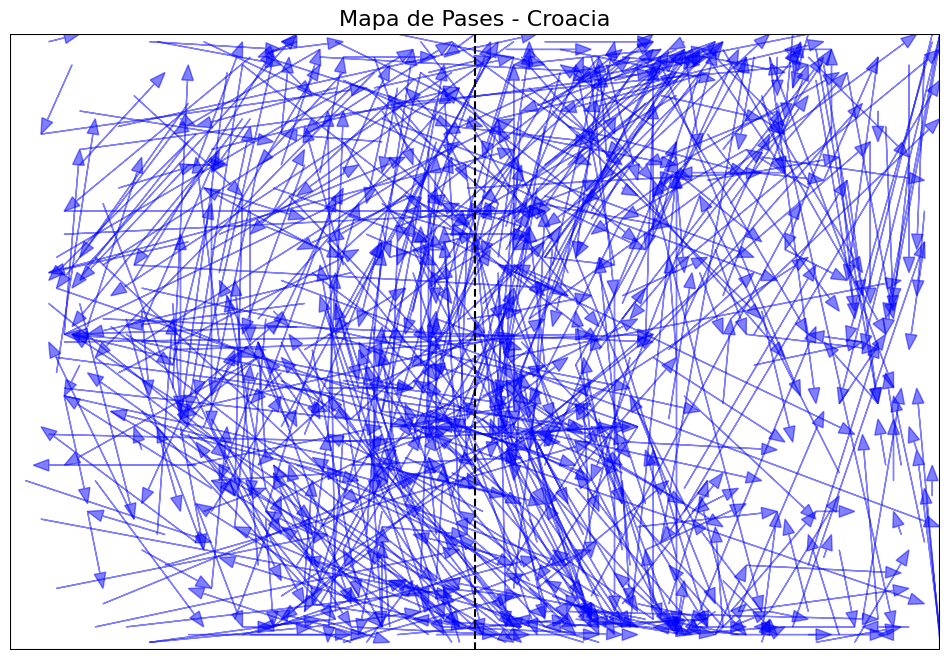

In [17]:
# Extraer coordenadas de origen y destino de los pases
pases_croacia['x_start'] = pases_croacia['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
pases_croacia['y_start'] = pases_croacia['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
pases_croacia['x_end'] = pases_croacia['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
pases_croacia['y_end'] = pases_croacia['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

# Dibujar el campo de fútbol
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar líneas del campo
plt.plot([0, 0], [0, 80], color="black")
plt.plot([0, 120], [80, 80], color="black")
plt.plot([120, 120], [80, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 80], color="black", linestyle="--")  # Medio campo

plt.xlim(0, 120)
plt.ylim(0, 80)
plt.axis('off')
plt.title('Mapa de Pases - Croacia', fontsize=16)

# Dibujar flechas de los pases
for i, row in pases_croacia.iterrows():
    if pd.notnull(row['x_start']) and pd.notnull(row['y_start']) and pd.notnull(row['x_end']) and pd.notnull(row['y_end']):
        plt.arrow(row['x_start'], row['y_start'],
                  row['x_end'] - row['x_start'],
                  row['y_end'] - row['y_start'],
                  head_width=1.5, head_length=2,
                  fc='blue', ec='blue', alpha=0.5, length_includes_head=True)

plt.show()

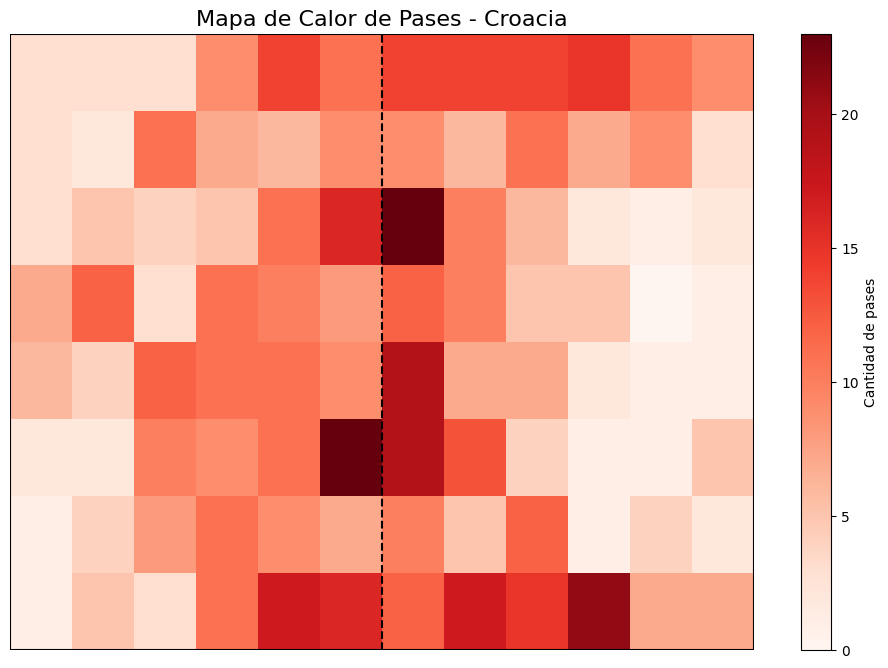

In [18]:
# 1. Crear figura del campo
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar el campo como antes
plt.plot([0, 0], [0, 80], color="black")
plt.plot([0, 120], [80, 80], color="black")
plt.plot([120, 120], [80, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 80], color="black", linestyle="--")
plt.xlim(0, 120)
plt.ylim(0, 80)
plt.axis('off')
plt.title('Mapa de Calor de Pases - Croacia', fontsize=16)

# 2. Extraer coordenadas de inicio de los pases
x = pases_croacia['x_start']
y = pases_croacia['y_start']

# 3. Crear mapa de calor con hist2d
plt.hist2d(x, y, bins=[12, 8], range=[[0, 120], [0, 80]], cmap='Reds')

# 4. Agregar barra de colores
cbar = plt.colorbar()
cbar.set_label('Cantidad de pases')

plt.show()